**Bibliotecas**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

**Bases**

In [2]:
path = 'https://raw.githubusercontent.com/Tyra02/IA/main/jogarTenis.csv'
base = pd.read_csv(path)

In [3]:
base

,Aparência,Temperatura,Umidade,Ventando,Jogar
0,Sol,Quente,Alta,Não,Não
1,Sol,Quente,Alta,Sim,Não
2,Nublado,Quente,Alta,Não,Sim
3,Chuva,Agradável,Alta,Não,Sim
4,Chuva,Fria,Normal,Não,Sim
5,Chuva,Fria,Normal,Sim,Não
6,Nublado,Fria,Normal,Sim,Sim
7,Sol,Agradável,Alta,Não,Não
8,Sol,Fria,Normal,Não,Sim
9,Chuva,Agradável,Normal,Não,Sim


**Tratando a base**

In [4]:
X = base.copy()
Y = X.pop('Jogar')

In [5]:
encoder = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [0])], remainder='passthrough')
X = encoder.fit_transform(X)

encoder = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [3])], remainder='passthrough')
X = encoder.fit_transform(X)

encoder = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [6])], remainder='passthrough')
X = encoder.fit_transform(X)

encoder = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [8])], remainder='passthrough')
X = encoder.fit_transform(X)

In [6]:
X

array([[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0],
       [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0],
       [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0],
       [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0],
       [1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0],
       [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0],
       [1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0],
       [1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0],
       [0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0],
       [0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0],
       [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0],
       [0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]], dtype=object)

**Separando treino e teste**

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 23)

**Treinando o modelo**

In [8]:
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

**Prevendo e mostrando resultados**

In [9]:
Y_pred = dtc.predict(X_test)
Y_pred

array(['Não', 'Não', 'Sim'], dtype=object)

In [10]:
Y_test

0    Não
1    Não
2    Sim
Name: Jogar, dtype: object

<Axes: >

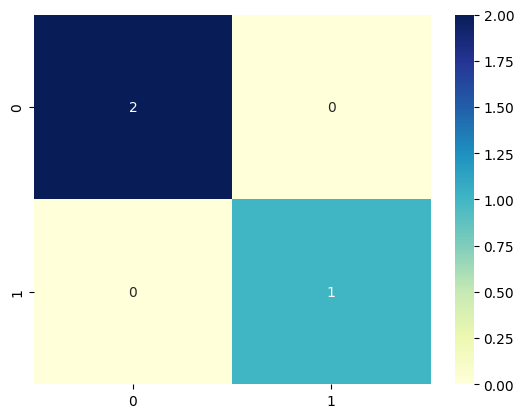

In [11]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred)
cm_matrix = pd.DataFrame(data=cm)
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [12]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         Não       1.00      1.00      1.00         2
         Sim       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



**Ajustando hiperparâmetros**

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
params = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
}

dtgs = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    cv=8,
    n_jobs=5,
    verbose=1,
)

In [15]:
dtgs.fit(X_train, Y_train)
print(dtgs.best_params_)
print(dtgs.best_score_)

Fitting 8 folds for each of 84 candidates, totalling 672 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=8.
  warnings.warn(


{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2'}
0.875


**Treinando o modelo**

In [16]:
dtgs = DecisionTreeClassifier(max_depth=10, criterion='entropy', max_features='sqrt')
dtgs.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt')

**Prevendo e mostrando resultados**

In [17]:
Y_pred = dtgs.predict(X_test)
Y_pred

array(['Sim', 'Não', 'Sim'], dtype=object)

In [18]:
Y_test

0    Não
1    Não
2    Sim
Name: Jogar, dtype: object

<Axes: >

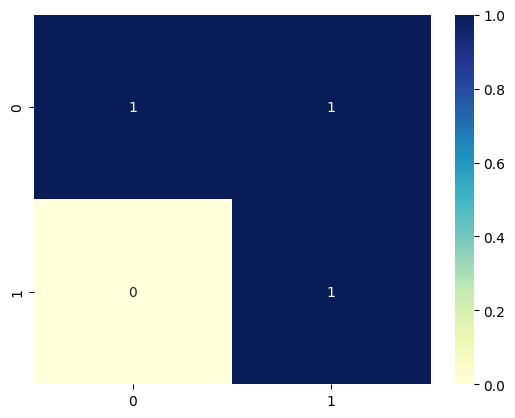

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred)
cm_matrix = pd.DataFrame(data=cm)
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [20]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         Não       1.00      0.50      0.67         2
         Sim       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3

